<a href="https://colab.research.google.com/github/moji-moji-idn/Abnormal_Prediction/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/smallcowbaby/OmniAnomaly && cd OmniAnomaly

Cloning into 'OmniAnomaly'...
remote: Enumerating objects: 204, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 204 (delta 2), reused 3 (delta 1), pack-reused 198
Receiving objects: 100% (204/204), 107.11 MiB | 23.26 MiB/s, done.
Resolving deltas: 100% (80/80), done.
Updating files: 100% (132/132), done.


In [ ]:
import numpy as np
import pandas as pd
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
std = StandardScaler()
from datetime import date
import holidays
KR_holidays = holidays.KR()
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation, BatchNormalization, GRU
from keras import optimizers
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import os

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta
from datetime import datetime
import datetime as dt
from tqdm import tqdm
from time import sleep
from scipy import stats

In [ ]:
root_path = '/content/OmniAnomaly/ServerMachineDataset'

In [ ]:
df = pd.read_csv(root_path+'/train/machine-1-6.txt')
with open(root_path+'/interpretation_label/machine-1-6.txt', 'r') as file:
    anomaly_events = file.readlines()
df

,0.061728,0.023016,0.020349,0.021759,0.619565,0.878453,0.067323,0.000000,0.001828,0.000399,...,0.000000.4,0.098151,0.116625,0.168103,0.000000.5,0.063830,0.091595,0.091252,0.000000.6,0.000000.7
0,0.148148,0.043671,0.025748,0.023148,0.619565,0.941529,0.103722,0.0,0.081512,0.137459,...,0.0,0.179232,0.140706,0.165948,0.0,0.080851,0.121441,0.121098,0.0,0.0
1,0.419753,0.406905,0.154070,0.070833,0.619565,0.985727,0.102901,0.0,0.667574,0.207061,...,0.0,0.210526,0.133330,0.163793,0.0,0.029787,0.108405,0.108748,0.0,0.0
2,0.407407,0.303334,0.199336,0.094907,0.619565,0.947514,0.064313,0.0,0.814637,0.195025,...,0.0,0.214794,0.109206,0.105603,0.0,0.038298,0.110806,0.111149,0.0,0.0
3,0.283951,0.231632,0.209718,0.106019,0.619565,0.958103,0.062945,0.0,0.483795,0.310610,...,0.0,0.213371,0.119246,0.088362,0.0,0.042553,0.101544,0.101201,0.0,0.0
4,0.320988,0.309826,0.269103,0.137037,0.619565,0.996777,0.063218,0.0,0.538258,0.265546,...,0.0,0.243243,0.167940,0.150862,0.0,0.059574,0.145798,0.145798,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23682,0.160494,0.054588,0.077243,0.083333,0.717391,0.787293,0.243295,0.0,0.012469,0.000187,...,0.0,0.291607,0.339701,0.299569,0.0,0.038298,0.277873,0.277873,0.0,0.0
23683,0.160494,0.047212,0.072674,0.080556,0.717391,0.793278,0.243842,0.0,0.010925,0.000024,...,0.0,0.288762,0.353963,0.318966,0.0,0.051064,0.285077,0.285077,0.0,0.0
23684,0.148148,0.071998,0.078488,0.082407,0.717391,0.796961,0.244116,0.0,0.011575,0.000006,...,0.0,0.300142,0.345255,0.308190,0.0,0.055319,0.280961,0.280961,0.0,0.0
23685,0.172840,0.203895,0.122093,0.098611,0.717391,0.799724,0.244116,0.0,0.011372,0.000018,...,0.0,0.314367,0.368669,0.323276,0.0,0.063830,0.289537,0.289537,0.0,0.0


In [ ]:
# Renaming the columns for clarity
column_names = [
    'CPU utilization rate', 'CPU utilization rate 2', 'Memory usage rate', 'Memory usage rate 2',
    'Disk read throughput', 'Disk write throughput', 'Network receive throughput', 'Network send throughput',
    'CPU user time', 'CPU system time', 'CPU idle time', 'CPU I/O wait time', 'CPU IRQ time',
    'CPU soft IRQ time', 'CPU steal time', 'Context switches', 'Interrupts', 'Load 1 minute',
    'Load 5 minutes', 'Load 15 minutes', 'Disk used space', 'Disk free space', 'Disk total space',
    'Disk read latency', 'Disk write latency', 'Disk read IOPS', 'Disk write IOPS', 'Network inbound packets',
    'Network outbound packets', 'Network inbound errors', 'Network outbound errors', 'Network inbound drops',
    'Network outbound drops', 'Network connections established', 'Network connections listening',
    'Network connections time wait', 'Network connections close wait', 'Network connections closed'
]
df.columns = column_names

# Re-display the first few rows with updated column names
df.head()

,CPU utilization rate,CPU utilization rate 2,Memory usage rate,Memory usage rate 2,Disk read throughput,Disk write throughput,Network receive throughput,Network send throughput,CPU user time,CPU system time,...,Network outbound packets,Network inbound errors,Network outbound errors,Network inbound drops,Network outbound drops,Network connections established,Network connections listening,Network connections time wait,Network connections close wait,Network connections closed
0,0.148148,0.043671,0.025748,0.023148,0.619565,0.941529,0.103722,0.0,0.081512,0.137459,...,0.0,0.179232,0.140706,0.165948,0.0,0.080851,0.121441,0.121098,0.0,0.0
1,0.419753,0.406905,0.154070,0.070833,0.619565,0.985727,0.102901,0.0,0.667574,0.207061,...,0.0,0.210526,0.133330,0.163793,0.0,0.029787,0.108405,0.108748,0.0,0.0
2,0.407407,0.303334,0.199336,0.094907,0.619565,0.947514,0.064313,0.0,0.814637,0.195025,...,0.0,0.214794,0.109206,0.105603,0.0,0.038298,0.110806,0.111149,0.0,0.0
3,0.283951,0.231632,0.209718,0.106019,0.619565,0.958103,0.062945,0.0,0.483795,0.310610,...,0.0,0.213371,0.119246,0.088362,0.0,0.042553,0.101544,0.101201,0.0,0.0
4,0.320988,0.309826,0.269103,0.137037,0.619565,0.996777,0.063218,0.0,0.538258,0.265546,...,0.0,0.243243,0.167940,0.150862,0.0,0.059574,0.145798,0.145798,0.0,0.0


In [ ]:
# 2. 이상 구간 정보
anomaly_info = """
246-252:1,2,3,4,6,9,10,11,12,13,15
653-658:1,2,3,4,6,9,10,11,12,13,15,19,20,21,22,26,28,30,31,32
2092-2100:1,2,3,4,6,9,10,11,12,13,15,19,20,21,22,26,28,30,31,32
2884-2888:6
3534-3539:1,2,3,4,6,9,10,11,12,13,15,19,20,21,22
4647-5045:5,6,9,10,11,13,17,33,34
5167-5172:9,10,11,13,18
5708-5713:9,10,11,13
5873-5885:2,3,6,9,10,11,13,19,20,21,22,28,31,32
6022-6027:33,34
6412-6419:1,2,3,6,9,10,11,13,15,19,20,21,22,28,30,31,32,35,36
7851-7856:1,2,9,10,11,13,19,20,21,22,23,28,30,31,32
9291-9298:1,2,3,9,10,11,13,19,20,21,22,23,28,30,31,32
10731-10736:1,2,3,9,10,11,13,19,20,21,22,23,28,30,31,32
11467-11471:1,2,3,6,9,10,11,13,19,20,21,22,23,28,30,31,32
12171-12176:1,2,3,6,9,10,11,13,19,20,21,22,23,28,30,31,32
13069-13073:33,34
13277-13280:17
13613-13619:1,2,9,10,11,12,13,30
14603-14607:9,10,11,13,19,20,21,22,32,37
15052-15055:9,10,11,13
15397-15401:9,12,13
15802-15805:9,10,11,13
16491-16499:1,2,3,9,10,11,13,15
16718-16721:9,10,11,13
16972-16976:9,12,13,15
17931-17939:1,2,3,6,9,10,11,12,13,15,19,20,21,22,23,28,30,31,32
18600-21761:1,2,3,4,6,9,10,11,12,13,14,15,16,23,25,28,30,31,32,35,36
22252-22260:9,13,15
22417-22420:11,13

"""

# 3. 라벨 초기화
labels = np.zeros(df.shape[0], dtype=int)

# 4. 이상 구간 라벨링 함수
def parse_anomaly_info(anomaly_info):
    for line in anomaly_info.strip().split('\n'):
        range_part, _ = line.split(':')
        start, end = map(int, range_part.split('-'))
        labels[start:end+1] = 1

# 5. 라벨링 실행
parse_anomaly_info(anomaly_info)
df['Anomaly'] = labels
df

,CPU utilization rate,CPU utilization rate 2,Memory usage rate,Memory usage rate 2,Disk read throughput,Disk write throughput,Network receive throughput,Network send throughput,CPU user time,CPU system time,...,Network inbound errors,Network outbound errors,Network inbound drops,Network outbound drops,Network connections established,Network connections listening,Network connections time wait,Network connections close wait,Network connections closed,Anomaly
0,0.148148,0.043671,0.025748,0.023148,0.619565,0.941529,0.103722,0.0,0.081512,0.137459,...,0.179232,0.140706,0.165948,0.0,0.080851,0.121441,0.121098,0.0,0.0,0
1,0.419753,0.406905,0.154070,0.070833,0.619565,0.985727,0.102901,0.0,0.667574,0.207061,...,0.210526,0.133330,0.163793,0.0,0.029787,0.108405,0.108748,0.0,0.0,0
2,0.407407,0.303334,0.199336,0.094907,0.619565,0.947514,0.064313,0.0,0.814637,0.195025,...,0.214794,0.109206,0.105603,0.0,0.038298,0.110806,0.111149,0.0,0.0,0
3,0.283951,0.231632,0.209718,0.106019,0.619565,0.958103,0.062945,0.0,0.483795,0.310610,...,0.213371,0.119246,0.088362,0.0,0.042553,0.101544,0.101201,0.0,0.0,0
4,0.320988,0.309826,0.269103,0.137037,0.619565,0.996777,0.063218,0.0,0.538258,0.265546,...,0.243243,0.167940,0.150862,0.0,0.059574,0.145798,0.145798,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23682,0.160494,0.054588,0.077243,0.083333,0.717391,0.787293,0.243295,0.0,0.012469,0.000187,...,0.291607,0.339701,0.299569,0.0,0.038298,0.277873,0.277873,0.0,0.0,0
23683,0.160494,0.047212,0.072674,0.080556,0.717391,0.793278,0.243842,0.0,0.010925,0.000024,...,0.288762,0.353963,0.318966,0.0,0.051064,0.285077,0.285077,0.0,0.0,0
23684,0.148148,0.071998,0.078488,0.082407,0.717391,0.796961,0.244116,0.0,0.011575,0.000006,...,0.300142,0.345255,0.308190,0.0,0.055319,0.280961,0.280961,0.0,0.0,0
23685,0.172840,0.203895,0.122093,0.098611,0.717391,0.799724,0.244116,0.0,0.011372,0.000018,...,0.314367,0.368669,0.323276,0.0,0.063830,0.289537,0.289537,0.0,0.0,0


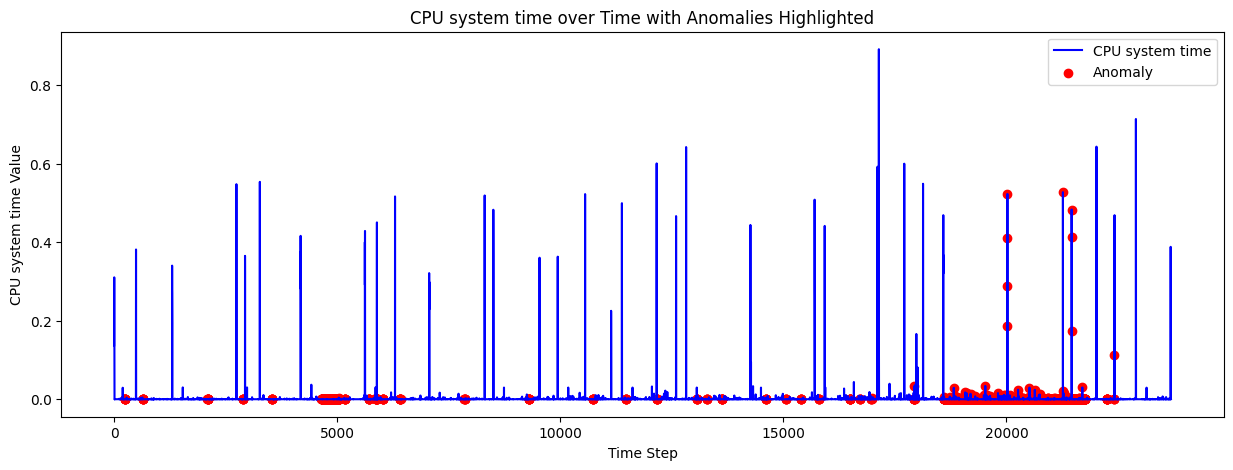

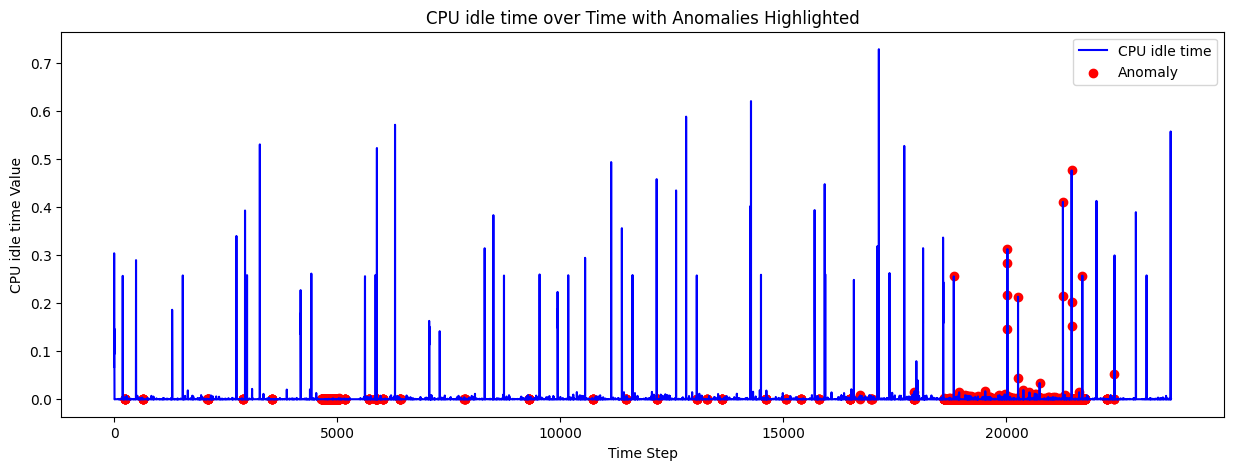

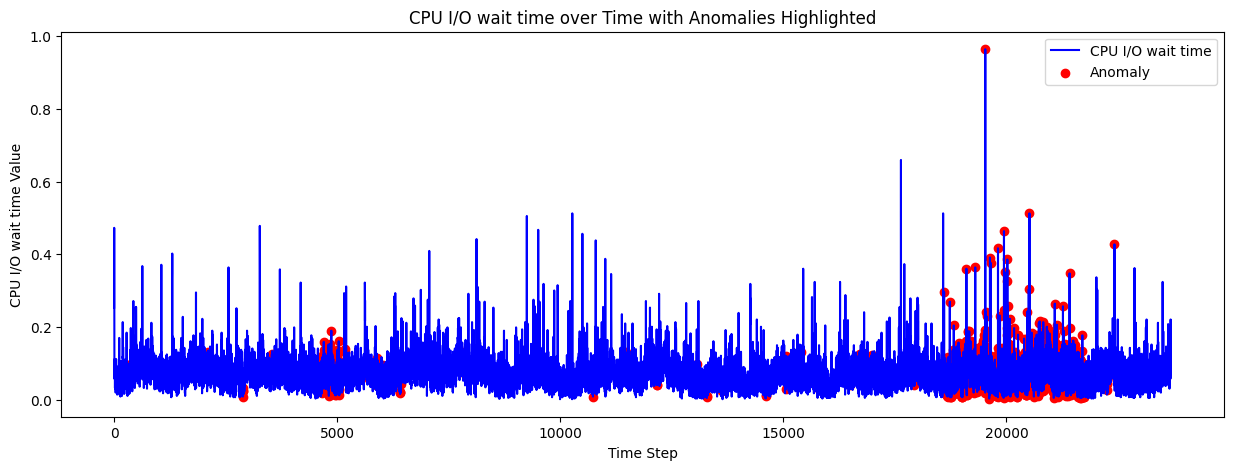

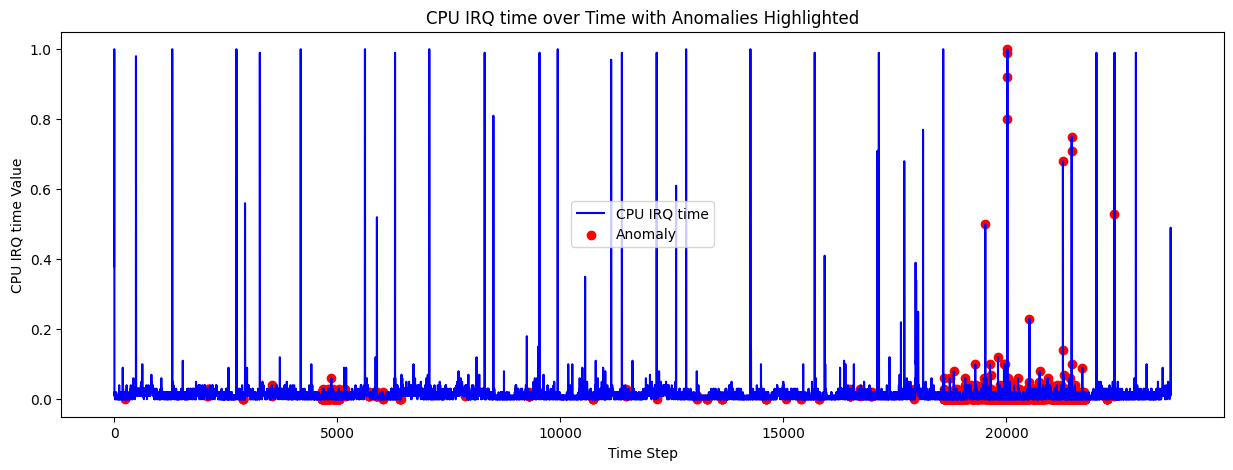

In [ ]:
import matplotlib.pyplot as plt

# Function to plot a given dimension with anomalies highlighted
def plot_dimension_with_anomalies(dimension_name):
    plt.figure(figsize=(15, 5))
    plt.plot(df[dimension_name], label=dimension_name, color='blue')

    # Highlighting anomalies
    anomalies = df[df['Anomaly'] == 1]
    plt.scatter(anomalies.index, anomalies[dimension_name], color='red', label='Anomaly')

    plt.title(f"{dimension_name} over Time with Anomalies Highlighted")
    plt.xlabel("Time Step")
    plt.ylabel(f"{dimension_name} Value")
    plt.legend()
    plt.show()

# Plotting the specified dimensions as an example
for feature in column_names[9:13]:  # Adjust the range as needed to select specific features
    plot_dimension_with_anomalies(feature)

In [ ]:
df.columns

Index(['CPU utilization rate', 'CPU utilization rate 2', 'Memory usage rate',
       'Memory usage rate 2', 'Disk read throughput', 'Disk write throughput',
       'Network receive throughput', 'Network send throughput',
       'CPU user time', 'CPU system time', 'CPU idle time',
       'CPU I/O wait time', 'CPU IRQ time', 'CPU soft IRQ time',
       'CPU steal time', 'Context switches', 'Interrupts', 'Load 1 minute',
       'Load 5 minutes', 'Load 15 minutes', 'Disk used space',
       'Disk free space', 'Disk total space', 'Disk read latency',
       'Disk write latency', 'Disk read IOPS', 'Disk write IOPS',
       'Network inbound packets', 'Network outbound packets',
       'Network inbound errors', 'Network outbound errors',
       'Network inbound drops', 'Network outbound drops',
       'Network connections established', 'Network connections listening',
       'Network connections time wait', 'Network connections close wait',
       'Network connections closed', 'Anomaly'],
    

In [ ]:
'''!!!시간 수정!!!'''
past_history = 12
future_target = 6
STEP = 1
predict_col = 0

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index, target_size):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])
        labels.append(target[i:i + target_size])
    return np.array(data), np.array(labels)

In [ ]:

def preprocessing(data, past_history, future_target, STEP, predict_col, feature):

    TRAIN_SPLIT = int(len(data)* 0.8)
    #TRAIN_SPLIT = int(len(data)-len(df2))

    #피쳐
    features_considered = feature


    features = data[features_considered]
    #features.index = data['date']
    #features.plot(subplots=True)
    F_dataset = features.values
    print(np.shape(F_dataset))
    F_scaler.fit(F_dataset)
    F_dataset = F_scaler.transform(F_dataset)
    print(np.shape(F_dataset))
    F_dataset = F_dataset.reshape(-1, len(features_considered))
    print(np.shape(F_dataset))
    print(F_dataset)

    #타겟
    features_considered = ['CPU utilization rate']
    features = data[features_considered]
    T_dataset = features.values
    T_scaler.fit(T_dataset)
    T_dataset = T_scaler.transform(T_dataset)
    T_dataset = T_dataset.reshape(-1, 1)
    print(np.shape(T_dataset))
    print(T_dataset)

    #이상치
    anomal = ['Anomaly']
    features = data[anomal]
    anomal_dataset = features.values

    anomal_dataset = anomal_dataset.reshape(-1, 1)
    print(np.shape(T_dataset))
    print(T_dataset)

    dataset = np.concatenate((T_dataset, F_dataset), axis=1)
    print(dataset)
    x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, predict_col], 0, TRAIN_SPLIT, past_history, future_target, STEP)

    x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, predict_col], TRAIN_SPLIT, None, past_history, future_target, STEP)
    x_val_anomal, y_val_anomal = multivariate_data(anomal_dataset, anomal_dataset[:, predict_col], TRAIN_SPLIT, None, past_history, future_target, STEP)
    return x_train_multi, y_train_multi, x_val_multi, y_val_multi, x_val_anomal, y_val_anomal


In [ ]:
F_scaler = MinMaxScaler()
T_scaler = MinMaxScaler()
'''!!!피쳐 수정!!!'''
feature_considered = ['CPU utilization rate 2', 'Memory usage rate',
       'Memory usage rate 2', 'Disk read throughput']
x_train_multi, y_train_multi, x_val_multi, y_val_multi, x_val_anomal, y_val_anomal = preprocessing(df, past_history, future_target, STEP, predict_col, feature_considered)

(23687, 4)
(23687, 4)
(23687, 4)
[[0.05415329 0.03914218 0.06944407 0.7600001 ]
 [0.50457385 0.23421764 0.21249921 0.7600001 ]
 [0.37614284 0.30303113 0.28472128 0.7600001 ]
 ...
 [0.08927958 0.11931767 0.24722125 0.88000005]
 [0.25283564 0.18560611 0.2958333  0.88000005]
 [0.13757746 0.16666743 0.28749929 0.88000005]]
(23687, 1)
[[0.31578902]
 [0.89473628]
 [0.86841982]
 ...
 [0.31578902]
 [0.36842195]
 [0.34210549]]
(23687, 1)
[[0.31578902]
 [0.89473628]
 [0.86841982]
 ...
 [0.31578902]
 [0.36842195]
 [0.34210549]]
[[0.31578902 0.05415329 0.03914218 0.06944407 0.7600001 ]
 [0.89473628 0.50457385 0.23421764 0.21249921 0.7600001 ]
 [0.86841982 0.37614284 0.30303113 0.28472128 0.7600001 ]
 ...
 [0.31578902 0.08927958 0.11931767 0.24722125 0.88000005]
 [0.36842195 0.25283564 0.18560611 0.2958333  0.88000005]
 [0.34210549 0.13757746 0.16666743 0.28749929 0.88000005]]


In [ ]:
BATCH_SIZE = 32
BUFFER_SIZE = 10
EPOCHS = 10
EVALUATION_INTERVAL = len(x_train_multi)//BATCH_SIZE
VALIDATION_STEPS = len(x_val_multi)//BATCH_SIZE # if you have validation data

In [ ]:
def create_time_steps(length):
  return range(-length, 0)

In [ ]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)


  plt.plot(num_in, np.array(history[:, predict_col]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'g',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'r',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
def build_generator():
    input = Input(shape=(12, 5))
    x = LSTM(64, return_sequences=True)(input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.3)(x)
    x = LSTM(64)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.3)(x)
    output = Dense(6, activation='linear')(x)  # 6시간 후의 예측값

    model = Model(inputs=input, outputs=output)
    return model
def build_discriminator():
    input = Input(shape=(6,))
    x = Dense(64)(input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.5)(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)  # 진짜(1) 또는 가짜(0)

    model = Model(inputs=input, outputs=output)
    return model
def compile_gan(generator, discriminator):
    # 판별자 컴파일
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
    discriminator.trainable = False

    # GAN 모델
    gan_input = Input(shape=(12, 5))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

    return gan
def train_gan(generator, discriminator, gan, X, epochs=100, batch_size=32):
    for epoch in range(epochs):
        # 진짜 데이터와 가짜 데이터 준비
        idx = np.random.randint(0, X.shape[0], batch_size)
        real_x = y_train_multi[idx]
        noise = np.random.normal(0, 1, (batch_size, 12, 5))
        fake_x = generator.predict(noise)

        # 판별자 훈련
        d_loss_real = discriminator.train_on_batch(real_x, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_x, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # 생성자 훈련
        noise = np.random.normal(0, 1, (batch_size, 12, 5))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # 진행 상황 출력
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1} / D Loss: {d_loss} / G Loss: {g_loss}")
generator = build_generator()
discriminator = build_discriminator()
gan = compile_gan(generator, discriminator)
train_gan(generator, discriminator, gan, x_train_multi)

1/1 [==============================] - 0s 16ms/step
Epoch 10 / D Loss: [0.68255234 0.53125   ] / G Loss: 0.6922723054885864
1/1 [==============================] - 0s 17ms/step
Epoch 20 / D Loss: [0.66845399 0.578125  ] / G Loss: 0.6903128623962402
1/1 [==============================] - 0s 18ms/step
Epoch 30 / D Loss: [0.67353585 0.515625  ] / G Loss: 0.6815587282180786
1/1 [==============================] - 0s 16ms/step
Epoch 40 / D Loss: [0.67051715 0.53125   ] / G Loss: 0.670865535736084
1/1 [==============================] - 0s 20ms/step
Epoch 50 / D Loss: [0.68131518 0.5       ] / G Loss: 0.6534024477005005
1/1 [==============================] - 0s 17ms/step
Epoch 60 / D Loss: [0.71640339 0.515625  ] / G Loss: 0.5977250933647156
1/1 [==============================] - 0s 18ms/step
Epoch 70 / D Loss: [0.77776366 0.453125  ] / G Loss: 0.539218544960022
1/1 [==============================] - 0s 17ms/step
Epoch 80 / D Loss: [0.7463938 0.53125  ] / G Loss: 0.6424202919006348
1/1 [=======

In [ ]:
from sklearn.metrics import mean_squared_error

# 생성자를 사용하여 테스트 데이터에 대한 예측 수행
predictions = generator.predict(x_val_multi)

# MSE 계산
mse = mean_squared_error(y_val_multi, predictions)
print(f"Mean Squared Error: {mse}")

# 오차 백분율 계산
errors = np.abs(predictions - y_val_multi)
percent_errors = np.mean(errors / y_val_multi, axis=0) * 100  # 각 시간 단위별 평균 오차 백분율
print("Error Percentage per future timestep:")
for i, pe in enumerate(percent_errors, start=1):
    print(f"Hour +{i}: {pe:.2f}%")


25/25 [==============================] - 1s 2ms/step
Mean Squared Error: 0.12789114709598798
Error Percentage per future timestep:
Hour +1: 228.18%
Hour +2: 216.51%
Hour +3: 316.71%
Hour +4: 130.59%
Hour +5: 113.19%
Hour +6: 56.83%


In [ ]:
print(np.shape(predictions))
print(np.shape(y_val_multi))
print(np.shape(y_val_anomal))

(787, 6)
(787, 6)
(787, 6)


In [ ]:
answer = np.reshape(y_val_multi, (-1, 1))
predict = np.reshape(predictions, (-1, 1))
anomal = np.reshape(y_val_anomal, (-1, 1))

In [ ]:
anomal_predict = [predict[i] for i, value in enumerate(anomal) if value == 1]
anomal_answer = [answer[i] for i, value in enumerate(anomal) if value == 1]

print(anomal_predict)
print(anomal_answer)

[array([0.68152505], dtype=float32), array([0.62383324], dtype=float32), array([0.84836704], dtype=float32), array([0.4822216], dtype=float32), array([0.4294868], dtype=float32), array([0.23212439], dtype=float32), array([0.68361545], dtype=float32), array([0.6262218], dtype=float32), array([0.8508256], dtype=float32), array([0.4849905], dtype=float32), array([0.4315803], dtype=float32), array([0.2335679], dtype=float32), array([0.68276316], dtype=float32), array([0.6268088], dtype=float32), array([0.8498936], dtype=float32), array([0.48485512], dtype=float32), array([0.4317733], dtype=float32), array([0.23443247], dtype=float32), array([0.6773839], dtype=float32), array([0.6252238], dtype=float32), array([0.8436603], dtype=float32), array([0.4820491], dtype=float32), array([0.42994815], dtype=float32), array([0.23497756], dtype=float32), array([0.677517], dtype=float32), array([0.62423766], dtype=float32), array([0.8407144], dtype=float32), array([0.48147875], dtype=float32), array([0

In [ ]:
import numpy as np



# 값이 1인 인덱스 저장
indices_with_value_one = [index for index, value in enumerate(anomal) if np.any(value == 1)]

# 결과 출력
print("값이 1인 인덱스:", indices_with_value_one)

값이 1인 인덱스: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

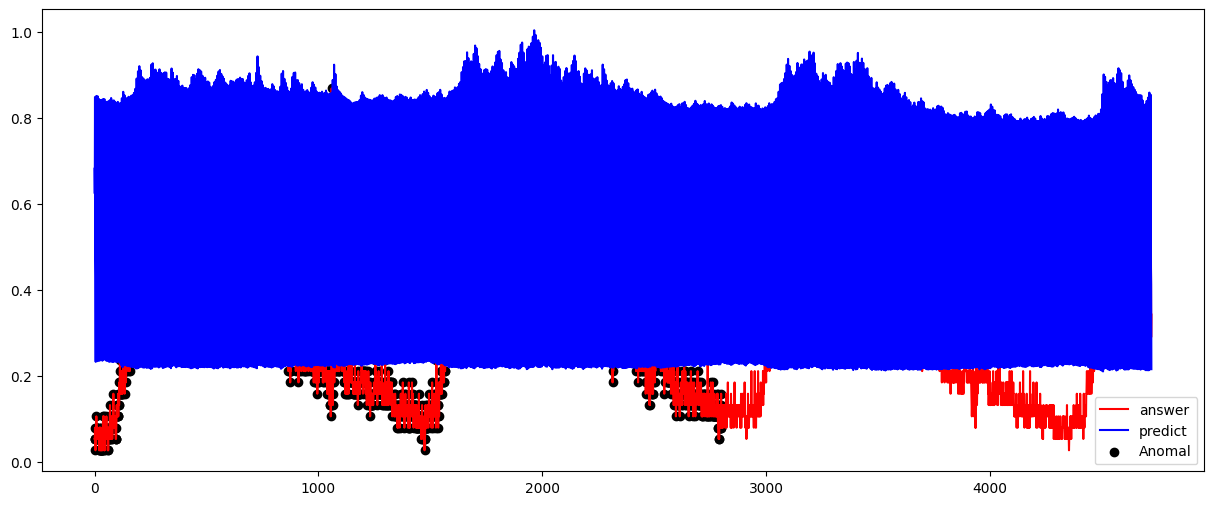

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(answer, color = 'r', label = 'answer')
plt.plot(predict, color = 'b', label = 'predict')
plt.scatter(indices_with_value_one, [answer[i] for i in indices_with_value_one], color='k', label='Anomal', marker='o')  # 이상치 산점도

plt.legend()
plt.show()

In [ ]:
#이상
import numpy as np
from sklearn.metrics import mean_squared_error

a = np.array(answer)
b = np.array(predict)

mse_value = mean_squared_error(a, b)  # MSE 계산
print("정상 구간 mse :", mse_value)

mape = np.mean(np.abs((a - b) / np.where(a != 0, a, np.finfo(float).eps))) * 100

# 오차 백분율 출력
print("정상 구간 평균 백분율:", mape)



정상 구간 mse : 0.12789114709598795
정상 구간 평균 백분율: 177.0019355456874


In [ ]:
#이상
import numpy as np
from sklearn.metrics import mean_squared_error

a = np.array(anomal_answer)
b = np.array(anomal_predict)

mse_value = mean_squared_error(a, b)  # MSE 계산
print("이상 구간 mse :", mse_value)

mape = np.mean(np.abs((a - b) / np.where(a != 0, a, np.finfo(float).eps))) * 100

# 오차 백분율 출력
print("이상 구간 평균 백분율:", mape)



이상 구간 mse : 0.12817355116219162
이상 구간 평균 백분율: 168.59836222030137


In [ ]:
'''
참고사항: 실제 값이 0에 가까운 경우, 백분율 오차는 매우 크게 나타날 수 있습니다.
'''

'\n참고사항: 실제 값이 0에 가까운 경우, 백분율 오차는 매우 크게 나타날 수 있습니다.\n'

In [ ]:
!pip install pydot graphviz

In [ ]:
from tensorflow.keras.utils import plot_model

# 기존에 정의된 모델 빌딩 함수를 사용하여 모델을 생성
generator = build_generator()
discriminator = build_discriminator()
gan = compile_gan(generator, discriminator)

# 생성자, 판별자 및 GAN 모델의 구조를 시각화
plot_model(generator, to_file='generator_model.png', show_shapes=True, show_layer_names=True, rankdir='TB')
plot_model(discriminator, to_file='discriminator_model.png', show_shapes=True, show_layer_names=True, rankdir='TB')
plot_model(gan, to_file='gan_model.png', show_shapes=True, show_layer_names=True, rankdir='TB')

print("모델 구조가 PNG 파일로 저장되었습니다.")


모델 구조가 PNG 파일로 저장되었습니다.
